In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

random_state = 123_456
np.random.seed(random_state)

sns.set()
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

In [8]:
df = pd.read_csv('fuel-prices/all_years_combined.csv', index_col='date', dtype={'price': np.int32}, parse_dates=True)
df.set_index(pd.date_range(min(df.index), periods=df.size, freq='D'), inplace=True, verify_integrity=True)

In [11]:
# _ = df.plot(figsize=(15, 5))

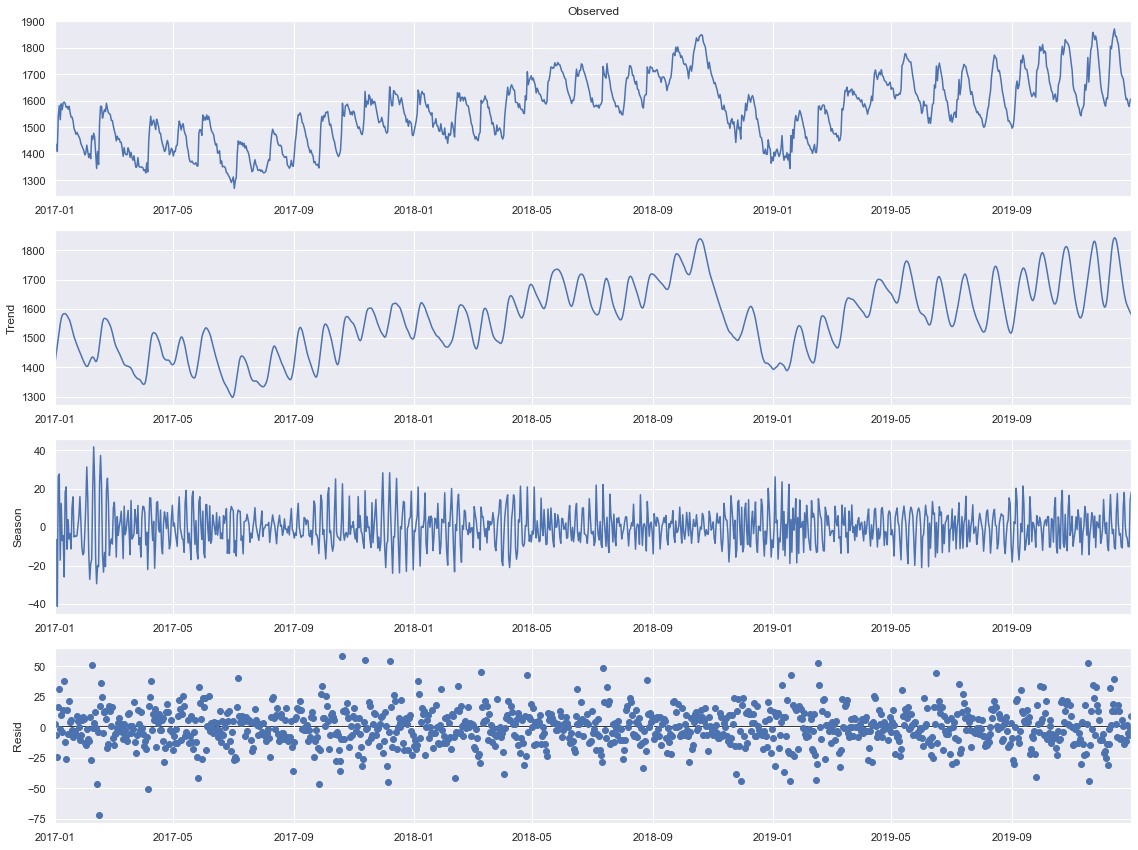

In [35]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['2017-01-01':])
res = stl.fit()
fig = res.plot()

In [36]:
series = getattr(res, 'trend')
series

2017-01-01    1423.313981
2017-01-02    1449.137123
2017-01-03    1474.367312
2017-01-04    1498.882209
2017-01-05    1523.067553
                 ...     
2019-12-27    1611.589718
2019-12-28    1603.564636
2019-12-29    1595.863704
2019-12-30    1588.460507
2019-12-31    1581.390938
Freq: D, Name: trend, Length: 1095, dtype: float64

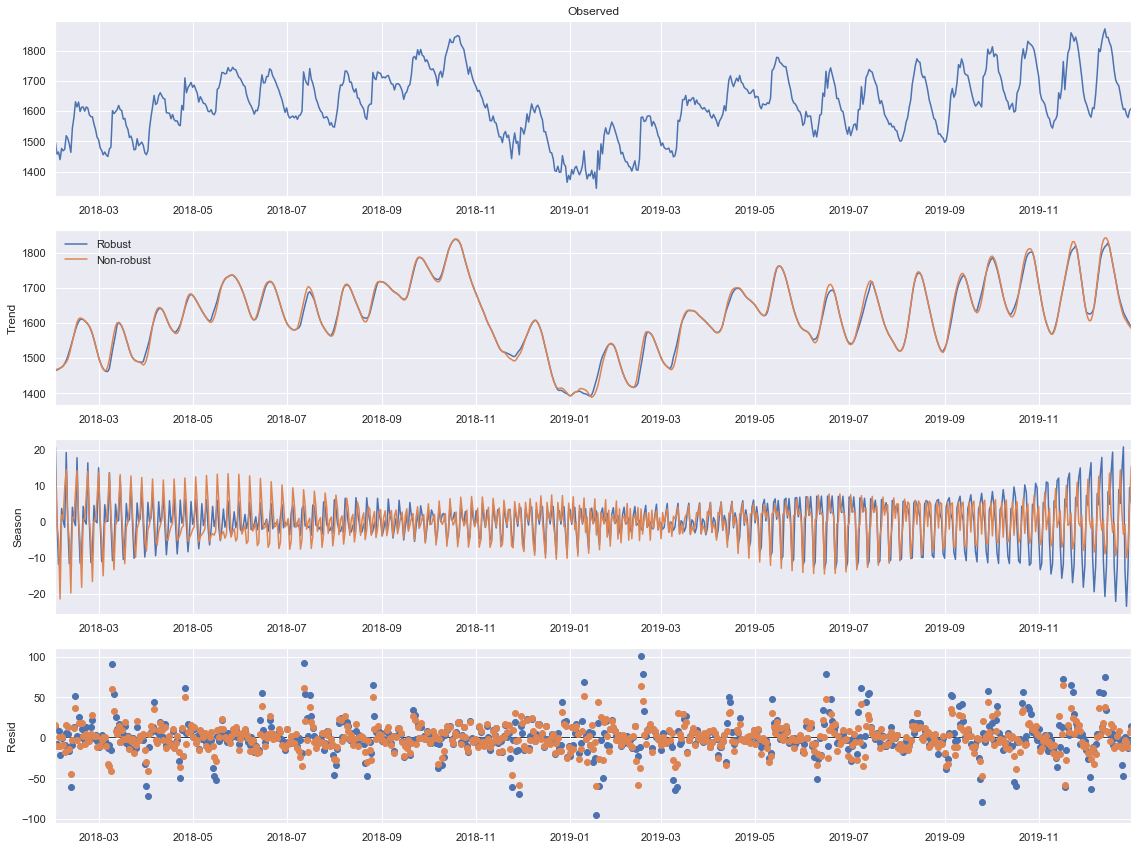

In [25]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none')
        else:
            ax.plot(series)
            if comp == 'trend':
                ax.legend(legend, frameon=False)


stl = STL(df['2018-02-01':], robust=True, seasonal=23)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(df['2018-02-01':], robust=False, seasonal=23).fit()
add_stl_plot(fig, res_non_robust, ['Robust','Non-robust'])